In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split # data split

In [39]:
df=pd.read_csv('penguins_size.csv') #loading of dataset

In [40]:
df.describe() #perform descriptive statistics

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: xlabel='culmen_length_mm', ylabel='count'>

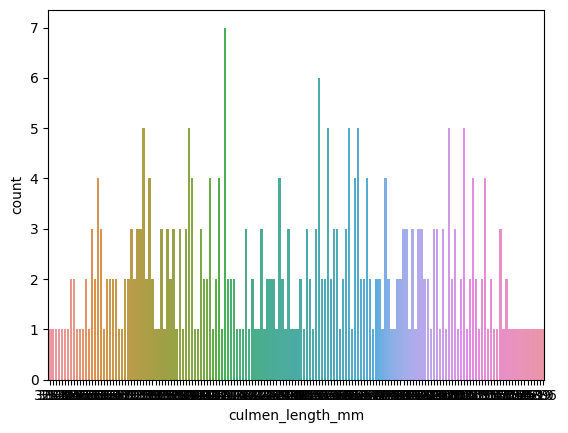

In [41]:
sns.countplot(data=df,x='culmen_length_mm') #univariate analysis

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

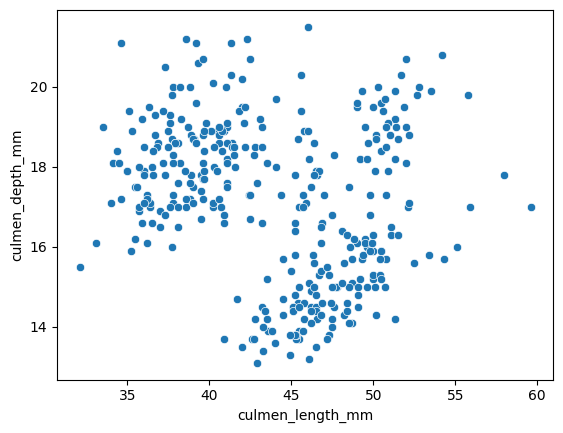

In [42]:
sns.scatterplot(data=df,x='culmen_length_mm',y='culmen_depth_mm') #bivariate analysis

<ipython-input-43-63a684a2a1fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:,1:10].corr(),cmap='cividis',annot=True,fmt='.0%')


<Axes: >

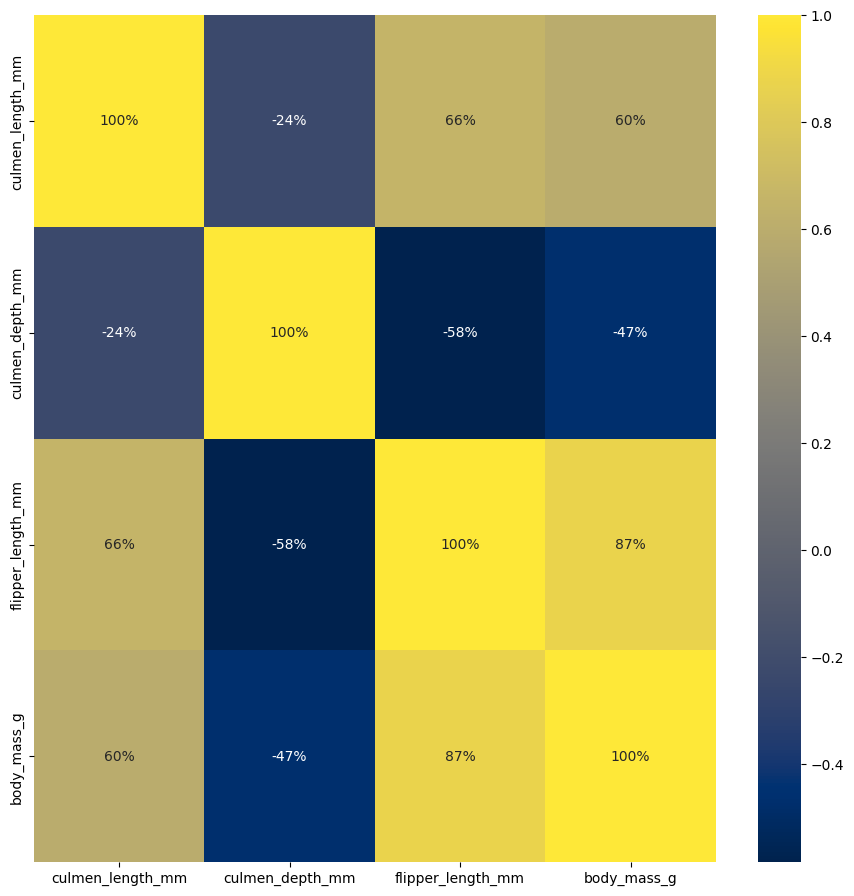

In [43]:
plt.figure(figsize=(11,11)) #multivariate analysis
sns.heatmap(df.iloc[:,1:10].corr(),cmap='cividis',annot=True,fmt='.0%')

In [44]:
df.isnull().sum() #Check for Missing values and deal with them.

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [45]:
#identifying categorical variables
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 3
Integer variables: 0
Float variables: 4


In [46]:
from sklearn.preprocessing import OneHotEncoder
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))

Categorical variables:
['species', 'island', 'sex']
No. of. categorical features:  3


In [47]:
#handling missing values
df['sex'] = df['sex'].fillna('MALE') 
print(df['sex'])

0        MALE
1      FEMALE
2      FEMALE
3        MALE
4      FEMALE
        ...  
339      MALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object


In [48]:
df.drop(df[df['body_mass_g'].isnull()].index,axis=0, inplace=True)

In [49]:
df.drop(df[df['sex']=='.'].index, inplace=True)
df["culmen_length_mm"] = df["culmen_length_mm"].fillna(value = df["culmen_length_mm"].mean())
df["culmen_depth_mm"] = df["culmen_depth_mm"].fillna(value = df["culmen_depth_mm"].mean())
df["flipper_length_mm"] = df["flipper_length_mm"].fillna(value = df["flipper_length_mm"].mean())
df["body_mass_g"] = df["body_mass_g"].fillna(value = df["body_mass_g"].mean())

df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [50]:
#encoding categorical variables
y = df["species"]
df_main = df.iloc[:,1:]
X = pd.get_dummies(df_main)
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1


In [51]:
#separating X and y
x = df.drop('sex', axis=1)
y = df['sex']

In [52]:
from sklearn.cluster import KMeans #Perform any of the clustering algorithms

model = KMeans(n_clusters=3)
model.fit(X)
labels = model.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
from sklearn.preprocessing import StandardScaler #scaling the data
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
pipeline = make_pipeline (scaler, model)
#using the pipeline object to fit and predict
pipeline.fit(X)
labels_new = pipeline.predict (X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
matrix = pd.DataFrame({'labels': labels_new, 'species': y})
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

species  FEMALE  MALE
labels               
0           107     0
1            58    64
2             0   112


In [55]:
original = df.copy()
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
new_df = original.copy()

new_df['culmen_length_mm'].fillna(np.mean(original['culmen_length_mm']), inplace = True)
new_df['culmen_depth_mm'].fillna(np.mean(original['culmen_depth_mm']), inplace = True)
new_df['flipper_length_mm'].fillna(np.mean(original['flipper_length_mm']), inplace = True)
new_df['body_mass_g'].fillna(np.mean(original['body_mass_g']), inplace = True)
new_df['sex'].fillna(original['sex'].mode()[0], inplace = True)

In [56]:
new_df_dummy = pd.get_dummies(new_df, columns = ['sex', 'island'], drop_first = True)
new_df_dummy['species'].unique()
new_df_dummy['species'].replace({'Adelie' : 0,
                                'Chinstrap' : 1,
                                'Gentoo': 2}, inplace = True)

In [57]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [58]:
X = new_df_dummy.drop(columns = ['species'])
Y = new_df_dummy['species']

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

In [60]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

pred = LR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
print('Accuracy : ', accuracy_score(Y_test, pred))
print('F1 Score : ', f1_score(Y_test, pred, average = 'weighted'))

Accuracy :  0.9767441860465116
F1 Score :  0.9769558986385252


In [62]:
confusion_matrix(Y_test, pred)

array([[33,  2,  0],
       [ 0, 20,  0],
       [ 0,  0, 31]])